In [1]:
import metaSI
import numpy as np
import torch
from matplotlib import pyplot as plt

In [2]:
from metaSI.density_networks import Circular_mixture_network
from metaSI.data import Norm

N = 10000
th_train = np.random.uniform(-1,1,size=N)+torch.pi
z_train = np.zeros((N,0))
th_val = np.random.uniform(-1,1,size=N)+torch.pi
z_val = np.zeros((N,0))
th_test = np.random.uniform(-1,1,size=N)+torch.pi
z_test = np.zeros((N,0))

norm = Norm(z_train, th_train)
norm.ystd = 1
norm.ymean = 0

load, filename = False, 'models/angle-pdf-static-uniform-dist-model'
if not load:
    dist_net = Circular_mixture_network(z_train.shape[1], None, norm=norm, n_components=30)
    dist_net.fit((z_train, th_train), (z_val, th_val), iterations=20_000, print_freq=1000)
    dist_net.save_to_file(filename)
else:
    dist_net = torch.load(filename)

z_normed, th_normed = dist_net.make_training_arrays((np.zeros((1,0)),th_train))
dist = dist_net.get_dist_normed(z_normed)
th_testing = torch.linspace(-torch.pi,torch.pi,500)
plt.plot(th_testing.numpy(),dist[0].prob(th_testing).detach().numpy(),'k')
plt.plot(th_testing.numpy(),dist[0].prob_per_weighted(th_testing).detach().numpy(),'r')
plt.hist((th_test+np.pi)%(2*np.pi) - np.pi,bins=int(N**0.5), density=True)
plt.show()

Number of datapoints: 10000 	Batch size:  256 	Iterations per epoch: 39


  0%|          | 1/20000 [00:00<?, ?it/s]

ValueError: Expected parameter concentration (Tensor of shape (256, 30)) of distribution VonMises(loc: torch.Size([256, 30]), concentration: torch.Size([256, 30])) to satisfy the constraint GreaterThan(lower_bound=0.0), but found invalid values:
tensor([[-1.8856, -0.9079, -1.7799,  ..., -0.6114,  0.1412, -1.3599],
        [-1.8856, -0.9079, -1.7799,  ..., -0.6114,  0.1412, -1.3599],
        [-1.8856, -0.9079, -1.7799,  ..., -0.6114,  0.1412, -1.3599],
        ...,
        [-1.8856, -0.9079, -1.7799,  ..., -0.6114,  0.1412, -1.3599],
        [-1.8856, -0.9079, -1.7799,  ..., -0.6114,  0.1412, -1.3599],
        [-1.8856, -0.9079, -1.7799,  ..., -0.6114,  0.1412, -1.3599]],
       grad_fn=<MulBackward0>)

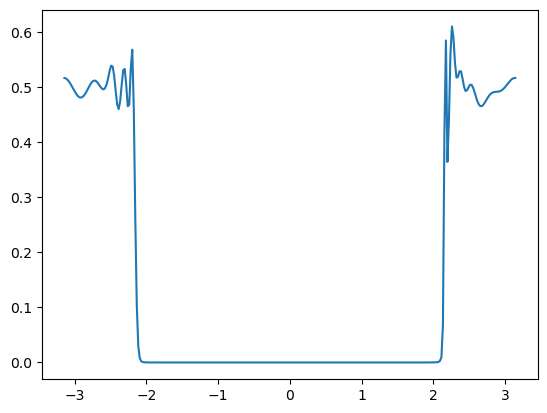

tensor(True)

In [17]:
dist0 = dist[0]
th_test_0 = torch.linspace(-torch.pi,torch.pi,300)

pth = dist0.prob(th_test_0)
real_part = torch.mean(torch.cos(th_test_0) * pth, axis=0)*2*torch.pi
imaginary_part = torch.mean(torch.sin(th_test_0) * pth, axis=0)*2*torch.pi
plt.plot(th_test_0.numpy(), pth.detach().numpy())
plt.show()
torch.atan2(imaginary_part, real_part)



In [15]:
def create_angle_data(N):
    th0 = (torch.rand(N)*2-1)*torch.pi
    z = torch.stack([torch.cos(th0), torch.sin(th0)], dim=1)
    th = th0 + (torch.rand(N)*2-1)
    return (z,th)
train, val, test = create_angle_data(100_000), create_angle_data(10_000), create_angle_data(100_000)

norm = Norm(u=train[0].numpy())
print(norm)#norm.umean, norm.ustd, norm.ymean, norm.ystd

load, filename = False, 'models/angle-pdf-1-input-par-model'
if not load:
    dist_net = Circular_mixture_network(nz=train[0].shape[1], nth=None, norm=norm, n_components=30)
    dist_net.fit(train=train, val=val, iterations=1000_000, print_freq=2000)
    dist_net.save_to_file(filename)
else:
    dist_net = torch.load(filename)

System_data_norm: (uumeean=[-0.00092294 -0.00038089], ustd=[0.70771784 0.7064859 ], ymean=0.0, ystd=1.0)
Number of datapoints: 100000 	Batch size:  256 	Iterations per epoch: 390


  0%|          | 1/1000000 [00:00<?, ?it/s]

it   2,000 loss -0.624! loss val -0.645!
it   4,000 loss -0.662! loss val -0.666!
it   6,000 loss -0.672! loss val -0.673!
it   8,000 loss -0.677! loss val -0.677!
it  10,000 loss -0.682! loss val -0.678!
it  12,000 loss -0.683! loss val -0.685!
it  14,000 loss -0.685! loss val -0.683 
it  16,000 loss -0.687! loss val -0.679 
it  18,000 loss -0.687! loss val -0.684 
it  20,000 loss -0.689! loss val -0.689!
it  22,000 loss -0.690! loss val -0.687 
it  24,000 loss -0.691! loss val -0.691!
it  26,000 loss -0.691! loss val -0.690 
it  28,000 loss -0.692! loss val -0.687 
it  30,000 loss -0.692! loss val -0.694!
it  32,000 loss -0.693! loss val -0.691 
it  34,000 loss -0.694! loss val -0.690 
it  36,000 loss -0.695! loss val -0.690 
it  38,000 loss -0.695! loss val -0.693 
it  40,000 loss -0.695! loss val -0.690 
it  42,000 loss -0.696! loss val -0.690 
it  44,000 loss -0.696! loss val -0.692 
it  46,000 loss -0.696! loss val -0.692 
it  48,000 loss -0.696  loss val -0.695!
it  50,000 loss 

In [16]:
th_test = torch.linspace(-torch.pi, torch.pi, 500)
dist_out = dist_net.get_dist(torch.stack([torch.cos(th_test), torch.sin(th_test)],axis=1))

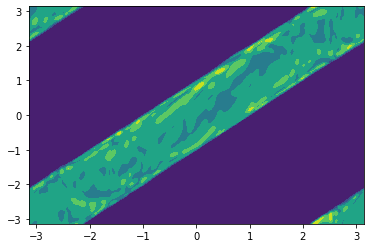

In [17]:
th_visual = torch.linspace(-torch.pi, torch.pi, 200)
pth = dist_out.prob(th_visual[:,None]).detach().numpy()
plt.contourf(th_test.numpy(), th_visual.numpy(), pth)
plt.show()
